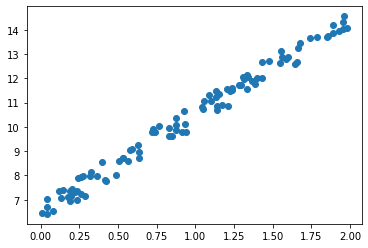

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

plt.scatter(X, y)

In [13]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N, 1))
    
    w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
    w1_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))  
    
    return w1_update, w0_update  

In [14]:
def gradient_descent_steps(X, y, iters = 10000):
    
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [18]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 10000)
print('w1:{0: .3f} w0:{1: .3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0,0] * X + w0
print(f'Gradient Descent Total Cost : {get_cost(y, y_pred): .4f}')


w1: 10.904 w0: 0.000
Gradient Descent Total Cost :  16.0683


In [22]:
np.random.permutation(X.shape[0])

array([18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74, 79,  1, 45, 28, 60, 52, 25, 39, 97, 44, 16, 55, 83, 49,
       22, 70, 47,  4, 82, 94, 53, 66, 26, 84, 31, 63,  8, 75, 98, 57, 71,
       99, 86, 96, 69, 24, 30, 13, 40, 56, 68, 95, 81, 19, 38, 91, 54, 32,
       51, 85, 11, 89, 90, 36, 65, 88, 41, 14, 27, 50, 20, 46, 67, 35, 62,
        2, 59, 23, 58, 43, 10,  0, 73, 21, 77, 42,  3, 93, 48, 34])

In [25]:
def stochastic_gradient_desent_steps(X, y, batch_size = 10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 = w1_update
        w0 = w0 = w0_update
        
        return w1, w0

In [26]:
w1, w0 = stochastic_gradient_desent_steps(X, y, iters = 1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0, 0], 3))

y_pred = w1[0, 0] * X + w0
print(f'stochastic Gradient Descent Total Cost: {get_cost(y, y_pred) : .4f}')

w1: -0.181 w0: 0.0
stochastic Gradient Descent Total Cost:  115.6614


[55.05168109]


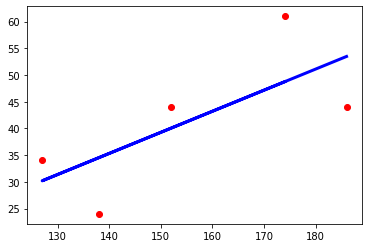

In [36]:
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [127], [186]]
y = [61, 44, 24, 34, 44]
reg.fit(X, y)

print(reg.predict([[190]]))

plt.scatter(X, y, color = 'r')

y_pred = reg.predict(X)

plt.plot(X, y_pred, color = 'b', linewidth= 3)
plt.show()

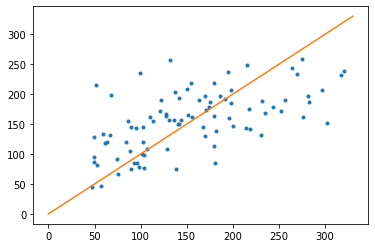

In [39]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets


diabetes = datasets.load_diabetes()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, '.')

x = np.linspace(0, 330, 100)
y = x 
plt.plot(x, y)
plt.show()

In [53]:
import pandas as pd
df = pd.read_csv('./housing (1).csv')
df_1 = pd.DataFrame(df)
df_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [54]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [60]:
poly = PolynomialFeatures(degree = 2)

poly.fit(X)

poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [61]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' , X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


In [65]:
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape :  (2, 10)
